In [3]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import os

In [0]:
!cd gdrive/'My Drive'/'Colab Notebooks'; ls;

얼굴인식.ipynb	   transformer.ipynb  Untitled1.ipynb
oasis_lyrics3.txt  Untitled0.ipynb


In [0]:
os.chdir("/content/gdrive/My Drive/Colab Notebooks")

In [26]:
!pip install -q tensorflow-gpu==2.1.0-rc1
#설치 후 런타임-런타임 다시시작을 눌러야 2.0이 설치 됨

     |████████████████████████████████| 421.8MB 32kB/s 
     |████████████████████████████████| 3.8MB 33.3MB/s 
     |████████████████████████████████| 450kB 48.2MB/s 
     |████████████████████████████████| 81kB 10.6MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.1.0 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
ERROR: tensorboard 2.1.0 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.1 which is incompatible.


In [1]:
import tensorflow as tf
tf.__version__

'2.1.0-rc1'

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf

import time
import numpy as np
import matplotlib.pyplot as plt
import random

# Text Preprocessing

In [0]:
data = ""
f = open("oasis_lyrics2.txt", 'r', encoding = "utf8")
while True:
    line = f.readline()
    if not line: break
    data+=line
f.close()

In [0]:
title = []

#get the titles
for i in range(1,len(data.split("title: "))):
    if i%100 == 0:
        print(i)
    title.append(data.split("title: ")[i].split("\n")[0])

100
200
300
400
500
600
700
800
900
1000
1100


In [0]:
#delete title
for i in range(len(title)):
    
    replace_line = 'title: '+title[i]+'\n'
    if i%100 == 0:
        print(i)
    data = data.replace(replace_line, '')

    

0
100
200
300
400
500
600
700
800
900
1000
1100


In [0]:
data_ans = data
type(data_ans)

str

In [0]:
#data_ans: delete first lines, <eos> marking, <eos>: end of song, end of sentence
lyric_split = data_ans.split('\n\n') #각 가사별 구분
lyric_split = list(map(lambda x: x.split('\n')[1:], lyric_split)) #첫번째 줄 제거
lyric_split = list(map(lambda x: '\n'.join(x), lyric_split)) 
data_ans = '\n\n'.join(lyric_split) #다시 합치기

data_ans = data_ans.replace('\n\n', '\n<eos>\n')
data_ans = data_ans.split('\n')


#data: data to list
data = data.replace("\n\n", "\n")
data = data.split('\n')



    
        

In [0]:
#last line deletion
data.pop(-1)
print(data[-1])
data_ans.pop(-1)
print(data_ans[-1])

you're gonna be the one that saves me
<eos>


In [0]:
print(len(data))
print(len(data_ans))

43454
43454


In [0]:
whole_data = []
for i in range(len(data)):
    if i%1000 == 0:
        print(i)
    whole_data.append(data[i]+'\t_'+data_ans[i]) 
    
whole_data[2]

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000


'Um bu bu bum da de\t_Pressure pushing down on me'

In [0]:
#파일에 쓰기
f = open("oasis_lyrics3.txt", 'w', encoding = "utf8")
f.write('\n'.join(whole_data))
f.close()

In [0]:
print(len(whole_data)*0.6)#train
print(len(whole_data)*0.2)#valid
print(len(whole_data)*0.6+len(whole_data)*0.2+len(whole_data)*0.2)#whole

26072.399999999998
8690.800000000001
43454.0


### 여기에 train, valid, test set 나누어서 파일 저장하는 코드

In [0]:
#이 상태로 train, valid, test data따로 저장
random.shuffle(whole_data)
whole_data_train = whole_data[:int(len(whole_data)*0.6)]
whole_data_valid = whole_data[int(len(whole_data)*0.6):int(len(whole_data)*0.6)+int(len(whole_data)*0.2)]
whole_data_test = whole_data[int(len(whole_data)*0.6)+int(len(whole_data)*0.2):]

In [0]:
def devider(text, dev):
    res = text.split(dev)
    return res
a = ['aaa\nccddd', 'sss\ndddd']
res = list(map(lambda x: devider(x, '\n'), a))
print(res)
en = list(map(lambda en: en[0], res))
de = list(map(lambda de: de[1], res))
print(en)
print(de)


[['aaa', 'ccddd'], ['sss', 'dddd']]
['aaa', 'sss']
['ccddd', 'dddd']


In [0]:
#encode, decode 나누기
def devider(text, dev):
    res = text.split(dev)
    return res

res = list(map(lambda x: devider(x, '\t_'), whole_data_train))
whole_data_train_en = list(map(lambda en: en[0], res))
whole_data_train_de = list(map(lambda de: de[1], res))

res = list(map(lambda x: devider(x, '\t_'), whole_data_valid))
whole_data_valid_en = list(map(lambda en: en[0], res))
whole_data_valid_de = list(map(lambda de: de[1], res))

res = list(map(lambda x: devider(x, '\t_'), whole_data_test))
whole_data_test_en = list(map(lambda en: en[0], res))
whole_data_test_de = list(map(lambda de: de[1], res))

#파일에 쓰기
f = open("oasis_lyrics_train_en.txt", 'w', encoding = "utf8")
f.write('\n'.join(whole_data_train_en))
f.close()

f = open("oasis_lyrics_train_de.txt", 'w', encoding = "utf8")
f.write('\n'.join(whole_data_train_en))
f.close()

f = open("oasis_lyrics_valid_en.txt", 'w', encoding = "utf8")
f.write('\n'.join(whole_data_valid))
f.close()

f = open("oasis_lyrics_valid_de.txt", 'w', encoding = "utf8")
f.write('\n'.join(whole_data_valid))
f.close()

f = open("oasis_lyrics_test_en.txt", 'w', encoding = "utf8")
f.write('\n'.join(whole_data_test))
f.close()

f = open("oasis_lyrics_test_de.txt", 'w', encoding = "utf8")
f.write('\n'.join(whole_data_test))
f.close()

In [0]:
print(len(whole_data_train))
print(len(whole_data_valid))
print(len(whole_data_test))
print(whole_data_train[0])

26072
8690
8692
To be where there's life	_(To be where there's life)


In [0]:
#파일에 각각 쓰기
f = open("oasis_lyrics_train.txt", 'w', encoding = "utf8")
f.write('\n'.join(whole_data_train))
f.close()

f = open("oasis_lyrics_valid.txt", 'w', encoding = "utf8")
f.write('\n'.join(whole_data_valid))
f.close()

f = open("oasis_lyrics_test.txt", 'w', encoding = "utf8")
f.write('\n'.join(whole_data_test))
f.close()

In [0]:
os.getcwd()

'/content/gdrive/My Drive/Colab Notebooks'

In [0]:
!ls;

얼굴인식.ipynb	       oasis_lyrics_train.txt  Untitled0.ipynb
oasis_lyrics3.txt      oasis_lyrics_valid.txt  Untitled1.ipynb
oasis_lyrics_test.txt  transformer.ipynb


# 여기서 시작


In [0]:
#train, valid따로 불러와야 함(train)
file_name = "oasis_lyrics_train.txt"
lines_dataset = tf.data.TextLineDataset(file_name)

@tf.function #이 decorator가 있어야 tensorflow 객체들에 대해 mapping가능
def slasher(text, spt):
    ex = tf.strings.split(text, spt)
    
    return ex

#train data가 [en, de]꼴로 저장될 수 있도록 함
lines_dataset_train = tf.data.TextLineDataset(file_name)

dataset_train_en_de = lines_dataset_train.map(lambda ex: slasher(ex, '\t_'))
    
    

In [0]:
#train, valid따로 불러와야 함(valid)
file_name = "oasis_lyrics_valid.txt"
lines_dataset = tf.data.TextLineDataset(file_name)

#train data가 [en, de]꼴로 저장될 수 있도록 함
lines_dataset_valid = tf.data.TextLineDataset(file_name)
dataset_valid_en_de = lines_dataset_valid.map(lambda ex: slasher(ex, '\t_'))

In [7]:
BUFFER_SIZE = 50000
BATCH_SIZE = 64
TAKE_SIZE = 5000
for en, de in dataset_train_en_de.take(5):
    print('en: ',en)
    print('de: ',de)
dataset_train_en_de = dataset_train_en_de.shuffle(BUFFER_SIZE, reshuffle_each_iteration=False)

en:  tf.Tensor(b"To be where there's life", shape=(), dtype=string)
de:  tf.Tensor(b"(To be where there's life)", shape=(), dtype=string)
en:  tf.Tensor(b'And cast your words away upon the waves', shape=(), dtype=string)
de:  tf.Tensor(b'And sail them home with acquiesce', shape=(), dtype=string)
en:  tf.Tensor(b'Your life is sneaking up behind', shape=(), dtype=string)
de:  tf.Tensor(b"It just won't let you go (No, it just won't let you go)", shape=(), dtype=string)
en:  tf.Tensor(b'Just the end of the night', shape=(), dtype=string)
de:  tf.Tensor(b"I'm feeling like I'm lost at sea", shape=(), dtype=string)
en:  tf.Tensor(b"Before you've breathed it in", shape=(), dtype=string)
de:  tf.Tensor(b'How does it feel ', shape=(), dtype=string)


In [8]:
tokenizer = tfds.features.text.Tokenizer()

vocabulary_set_en = set() #vocab for encode
vocabulary_set_de = set() #vocab for decode


for text_tensor_en, text_tensor_de in dataset_train_en_de:
    some_tokens_en = tokenizer.tokenize(text_tensor_en.numpy()) #text_tensor_en.numpy()->각 example의 문자열
    some_tokens_de = tokenizer.tokenize(text_tensor_de.numpy())
    vocabulary_set_en.update(some_tokens_en)
    vocabulary_set_de.update(some_tokens_de)
    

vocab_size_en = len(vocabulary_set_en)
vocab_size_de = len(vocabulary_set_de)
print('encode_vocab_size: ', vocab_size_en)
print('decode_vocab_size: ', vocab_size_de)

encode_vocab_size:  2751
decode_vocab_size:  2702


In [9]:
for en_de in dataset_train_en_de.take(5):
    print('en: ',en_de[0])
    print('de: ',en_de[1])

en:  tf.Tensor(b'Let there be love', shape=(), dtype=string)
de:  tf.Tensor(b'Let there be love...', shape=(), dtype=string)
en:  tf.Tensor(b'You know what some might say (you know what some might say)', shape=(), dtype=string)
de:  tf.Tensor(b'You know what some might say (you know what some might say)', shape=(), dtype=string)
en:  tf.Tensor(b'What was that sound ringing around your brain?', shape=(), dtype=string)
de:  tf.Tensor(b"Today was just a blur, you've got a head like a ghost train", shape=(), dtype=string)
en:  tf.Tensor(b"Can't get myself some piece of mind", shape=(), dtype=string)
de:  tf.Tensor(b"You know it's getting hard to fly", shape=(), dtype=string)
en:  tf.Tensor(b'Ah, ah, ah ah', shape=(), dtype=string)
de:  tf.Tensor(b'Ah, ah, ah ah', shape=(), dtype=string)


In [0]:
tokenizer_en = tfds.features.text.SubwordTextEncoder.build_from_corpus(
    (en.numpy() for en, de in dataset_train_en_de), target_vocab_size=2**12)
tokenizer_de = tfds.features.text.SubwordTextEncoder.build_from_corpus(
    (de.numpy() for en, de in dataset_train_en_de), target_vocab_size=2**12)

In [11]:
sample_string = 'you are my wonderwall brother'

tokenized_string = tokenizer_en.encode(sample_string)
print ('Tokenized string is {}'.format(tokenized_string))

original_string = tokenizer_en.decode(tokenized_string)
print ('The original string: {}'.format(original_string))

assert original_string == sample_string

Tokenized string is [3, 37, 9, 519, 3534, 1728]
The original string: you are my wonderwall brother


In [0]:
for ts in tokenized_string:
    print ('{} ----> {}'.format(ts, tokenizer_en.decode([ts])))

3 ----> you 
37 ----> are 
9 ----> my 
519 ----> wonderwall
3534 ---->  
1728 ----> brother


In [0]:
def encode(en, de):
    en = [tokenizer_en.vocab_size] + tokenizer_en.encode(
        en.numpy()) + [tokenizer_en.vocab_size+1]

    de = [tokenizer_de.vocab_size] + tokenizer_de.encode(
        de.numpy()) + [tokenizer_de.vocab_size+1]
  
    return en, de

In [0]:

def tf_encode(en_de):
    result_en, result_de = tf.py_function(encode, [en_de[0],en_de[1]], [tf.int64, tf.int64])
    result_en.set_shape([None])
    result_de.set_shape([None])

    return result_en, result_de

In [0]:
MAX_LENGTH = 40
BUFFER_SIZE = 20000
BATCH_SIZE = 64

In [15]:
def plus(c):
    a, b = c
    print(a+b)
['aaa' 'bbb' 'ccc',2]

['aaabbbccc', 2]

In [0]:
def filter_max_length(x, y, max_length=MAX_LENGTH):
    return tf.logical_and(tf.size(x) <= max_length,
                          tf.size(y) <= max_length)

In [38]:
for i in dataset_train_en_de.take(5):
  print(i)

tf.Tensor([b'Let there be love' b'Let there be love...'], shape=(2,), dtype=string)
tf.Tensor(
[b'You know what some might say (you know what some might say)'
 b'You know what some might say (you know what some might say)'], shape=(2,), dtype=string)
tf.Tensor(
[b'What was that sound ringing around your brain?'
 b"Today was just a blur, you've got a head like a ghost train"], shape=(2,), dtype=string)
tf.Tensor(
[b"Can't get myself some piece of mind"
 b"You know it's getting hard to fly"], shape=(2,), dtype=string)
tf.Tensor([b'Ah, ah, ah ah' b'Ah, ah, ah ah'], shape=(2,), dtype=string)


In [0]:
train_dataset = dataset_train_en_de.map(tf_encode)
train_dataset = train_dataset.filter(filter_max_length)
# cache the dataset to memory to get a speedup while reading from it.
train_dataset = train_dataset.cache()
train_dataset = train_dataset.shuffle(BUFFER_SIZE).padded_batch(BATCH_SIZE, padded_shapes = ([None], [None]))
train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE)


val_dataset = dataset_valid_en_de.map(tf_encode)
val_dataset = val_dataset.filter(filter_max_length).padded_batch(BATCH_SIZE, padded_shapes = ([None], [None]))

In [46]:
en, de = next(iter(val_dataset))
en, de

(<tf.Tensor: shape=(64, 16), dtype=int64, numpy=
 array([[3758,   16, 3575, ...,    0,    0,    0],
        [3758,   42,  396, ...,    0,    0,    0],
        [3758,   16,   60, ...,    0,    0,    0],
        ...,
        [3758,  515,    1, ...,    0,    0,    0],
        [3758,   52, 3541, ...,    0,    0,    0],
        [3758,  375,    2, ...,    0,    0,    0]])>,
 <tf.Tensor: shape=(64, 18), dtype=int64, numpy=
 array([[3695,  634,    9, ...,    0,    0,    0],
        [3695, 3478,   40, ...,    0,    0,    0],
        [3695,   89, 3478, ...,    0,    0,    0],
        ...,
        [3695,  585,    1, ...,    0,    0,    0],
        [3695,   54, 3478, ...,    0,    0,    0],
        [3695, 2395,    6, ...,    0,    0,    0]])>)

In [0]:
def get_angles(pos, i, d_model):
    angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
    return pos * angle_rates

In [0]:
def positional_encoding(position, d_model):
    angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                          np.arange(d_model)[np.newaxis, :],
                          d_model)
  
    # apply sin to even indices in the array; 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
  
    # apply cos to odd indices in the array; 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    
    pos_encoding = angle_rads[np.newaxis, ...]
    
    return tf.cast(pos_encoding, dtype=tf.float32)

(1, 50, 512)


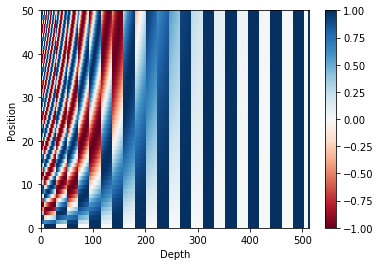

In [49]:
pos_encoding = positional_encoding(50, 512)
print (pos_encoding.shape)

plt.pcolormesh(pos_encoding[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 512))
plt.ylabel('Position')
plt.colorbar()
plt.show()

# Masking

In [0]:
def create_padding_mask(seq):
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32) #요소 값이 0(padding)이면 1을 반환(type은 float32로)
  
    # add extra dimensions to add the padding
    # to the attention logits.
    return seq[:, tf.newaxis, tf.newaxis, :]  # (batch_size, 1, 1, seq_len)

In [0]:
#look ahaed mask: 단어를 예측할 때 이전 단어에 대해서만 고려하도록 하는 masking
def create_look_ahead_mask(size):
    mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0) #band_part: 가장 안 쪽에 있는 행렬의 값을 0으로 만듦, 1-하삼각행렬 = 상삼각행렬
    return mask  # (seq_len, seq_len)

# scaled dot product attention

In [0]:
def scaled_dot_product_attention(q, k, v, mask):
    """Calculate the attention weights.
    q, k, v must have matching leading dimensions.
    k, v must have matching penultimate dimension, i.e.: seq_len_k = seq_len_v.
    The mask has different shapes depending on its type(padding or look ahead) 
    but it must be broadcastable for addition.

    Args:
    q: query shape == (..., seq_len_q, depth)
    k: key shape == (..., seq_len_k, depth)
    v: value shape == (..., seq_len_v, depth_v)
    mask: Float tensor with shape broadcastable 
          to (..., seq_len_q, seq_len_k). Defaults to None.

    Returns:
    output, attention_weights
    """

    matmul_qk = tf.matmul(q, k, transpose_b=True)  # (..., seq_len_q, seq_len_k)

    # scale matmul_qk
    dk = tf.cast(tf.shape(k)[-1], tf.float32)
    scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

    # add the mask to the scaled tensor.
    if mask is not None:
      scaled_attention_logits += (mask * -1e9)  

    # softmax is normalized on the last axis (seq_len_k) so that the scores
    # add up to 1.
    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)  # (..., seq_len_q, seq_len_k)

    output = tf.matmul(attention_weights, v)  # (..., seq_len_q, depth_v)

    return output, attention_weights

In [0]:
def print_out(q, k, v):
    temp_out, temp_attn = scaled_dot_product_attention(
      q, k, v, None)
    print ('Attention weights are:')
    print (temp_attn)
    print ('Output is:')
    print (temp_out)

# Multi head attention

In [0]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % self.num_heads == 0

        self.depth = d_model // self.num_heads

        self.wq = tf.keras.layers.Dense(d_model)
        self.wk = tf.keras.layers.Dense(d_model)
        self.wv = tf.keras.layers.Dense(d_model)

        self.dense = tf.keras.layers.Dense(d_model) #dense는 완전 연결 계층
        
    def split_heads(self, x, batch_size):
        """Split the last dimension into (num_heads, depth).
        Transpose the result such that the shape is (batch_size, num_heads, seq_len, depth)
        """
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])
    
    def call(self, v, k, q, mask): #__call__??
        batch_size = tf.shape(q)[0]

        q = self.wq(q)  # (batch_size, seq_len, d_model)
        k = self.wk(k)  # (batch_size, seq_len, d_model)
        v = self.wv(v)  # (batch_size, seq_len, d_model)

        q = self.split_heads(q, batch_size)  # (batch_size, num_heads, seq_len_q, depth)
        k = self.split_heads(k, batch_size)  # (batch_size, num_heads, seq_len_k, depth)
        v = self.split_heads(v, batch_size)  # (batch_size, num_heads, seq_len_v, depth)

        # scaled_attention.shape == (batch_size, num_heads, seq_len_q, depth)
        # attention_weights.shape == (batch_size, num_heads, seq_len_q, seq_len_k)
        scaled_attention, attention_weights = scaled_dot_product_attention(
            q, k, v, mask)

        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])  # (batch_size, seq_len_q, num_heads, depth)

        concat_attention = tf.reshape(scaled_attention, 
                                      (batch_size, -1, self.d_model))  # (batch_size, seq_len_q, d_model)

        output = self.dense(concat_attention)  # (batch_size, seq_len_q, d_model)

        return output, attention_weights

In [56]:
#예시
temp_mha = MultiHeadAttention(d_model=512, num_heads=8)
y = tf.random.uniform((1, 60, 512))  # (batch_size, encoder_sequence, d_model)
out, attn = temp_mha(y, k=y, q=y, mask=None)
out.shape, attn.shape

(TensorShape([1, 60, 512]), TensorShape([1, 8, 60, 60]))

# pointwise feed-forward network

In [0]:
def point_wise_feed_forward_network(d_model, dff):
    #2개의 network
    return tf.keras.Sequential([
      tf.keras.layers.Dense(dff, activation='relu'),  # (batch_size, seq_len, dff)
      tf.keras.layers.Dense(d_model)  # (batch_size, seq_len, d_model)
    ])

In [58]:
#예시
sample_ffn = point_wise_feed_forward_network(512, 2048)
sample_ffn(tf.random.uniform((64, 50, 512))).shape

TensorShape([64, 50, 512])

# Encoder and Decoder layers

In [0]:
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(EncoderLayer, self).__init__() #https://stackoverflow.com/questions/576169/understanding-python-super-with-init-methods
                                            #부모 클래스 초기화
        self.mha = MultiHeadAttention(d_model, num_heads)
        self.ffn = point_wise_feed_forward_network(d_model, dff)

        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, x, training, mask):

        attn_output, _ = self.mha(x, x, x, mask)  # (batch_size, input_seq_len, d_model) #x = q, k, v?
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)  # (batch_size, input_seq_len, d_model)

        ffn_output = self.ffn(out1)  # (batch_size, input_seq_len, d_model)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)  # (batch_size, input_seq_len, d_model)

        return out2

In [60]:
#예제
sample_encoder_layer = EncoderLayer(512, 8, 2048)

sample_encoder_layer_output = sample_encoder_layer(
    tf.random.uniform((64, 43, 512)), False, None)

sample_encoder_layer_output.shape  # (batch_size, input_seq_len, d_model)

TensorShape([64, 43, 512])

In [0]:
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(DecoderLayer, self).__init__()

        self.mha1 = MultiHeadAttention(d_model, num_heads)
        self.mha2 = MultiHeadAttention(d_model, num_heads)

        self.ffn = point_wise_feed_forward_network(d_model, dff)

        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)
        self.dropout3 = tf.keras.layers.Dropout(rate)

    
    def call(self, x, enc_output, training, 
           look_ahead_mask, padding_mask):
        # enc_output.shape == (batch_size, input_seq_len, d_model)

        attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask)  # (batch_size, target_seq_len, d_model)
        attn1 = self.dropout1(attn1, training=training)
        out1 = self.layernorm1(attn1 + x)

        attn2, attn_weights_block2 = self.mha2(
            enc_output, enc_output, out1, padding_mask)  # (batch_size, target_seq_len, d_model)
        attn2 = self.dropout2(attn2, training=training)
        out2 = self.layernorm2(attn2 + out1)  # (batch_size, target_seq_len, d_model)

        ffn_output = self.ffn(out2)  # (batch_size, target_seq_len, d_model)
        ffn_output = self.dropout3(ffn_output, training=training)
        out3 = self.layernorm3(ffn_output + out2)  # (batch_size, target_seq_len, d_model)
    
        return out3, attn_weights_block1, attn_weights_block2

# Encoder and Decoder

In [0]:
#encoder
class Encoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size,
               maximum_position_encoding, rate=0.1):
        super(Encoder, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        self.embedding = tf.keras.layers.Embedding(input_vocab_size, d_model)
        self.pos_encoding = positional_encoding(maximum_position_encoding, 
                                                self.d_model)


        self.enc_layers = [EncoderLayer(d_model, num_heads, dff, rate) 
                           for _ in range(num_layers)]

        self.dropout = tf.keras.layers.Dropout(rate)
        
    def call(self, x, training, mask):

        seq_len = tf.shape(x)[1]

        # adding embedding and position encoding.
        x = self.embedding(x)  # (batch_size, input_seq_len, d_model)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32)) #왜 scaling 하는 거지?  뒤에서 이를 다시 나눠줄 것이기 때문에??
        x += self.pos_encoding[:, :seq_len, :]

        x = self.dropout(x, training=training)
    
        for i in range(self.num_layers):
            x = self.enc_layers[i](x, training, mask)
    
        return x  # (batch_size, input_seq_len, d_model)

In [63]:
sample_encoder = Encoder(num_layers=2, d_model=512, num_heads=8, 
                         dff=2048, input_vocab_size=8500,
                         maximum_position_encoding=10000)
temp_input = tf.random.uniform((64, 62), dtype=tf.int64, minval=0, maxval=200)

sample_encoder_output = sample_encoder(temp_input, training=False, mask=None)

print (sample_encoder_output.shape)  # (batch_size, input_seq_len, d_model)

(64, 62, 512)


In [0]:
#decoder

class Decoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, target_vocab_size,
               maximum_position_encoding, rate=0.1):
        super(Decoder, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        self.embedding = tf.keras.layers.Embedding(target_vocab_size, d_model)
        self.pos_encoding = positional_encoding(maximum_position_encoding, d_model)

        self.dec_layers = [DecoderLayer(d_model, num_heads, dff, rate) 
                           for _ in range(num_layers)]
        self.dropout = tf.keras.layers.Dropout(rate)
    
    def call(self, x, enc_output, training, 
           look_ahead_mask, padding_mask):

        seq_len = tf.shape(x)[1]
        attention_weights = {}

        x = self.embedding(x)  # (batch_size, target_seq_len, d_model)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]

        x = self.dropout(x, training=training)

        for i in range(self.num_layers):
            x, block1, block2 = self.dec_layers[i](x, enc_output, training,
                                                look_ahead_mask, padding_mask)
          
            attention_weights['decoder_layer{}_block1'.format(i+1)] = block1
            attention_weights['decoder_layer{}_block2'.format(i+1)] = block2
    
        # x.shape == (batch_size, target_seq_len, d_model)
        return x, attention_weights

In [65]:
#예제

sample_decoder = Decoder(num_layers=2, d_model=512, num_heads=8, 
                         dff=2048, target_vocab_size=8000,
                         maximum_position_encoding=5000)
temp_input = tf.random.uniform((64, 26), dtype=tf.int64, minval=0, maxval=200)

output, attn = sample_decoder(temp_input, 
                              enc_output=sample_encoder_output, 
                              training=False,
                              look_ahead_mask=None, 
                              padding_mask=None)

output.shape, attn['decoder_layer2_block2'].shape

(TensorShape([64, 26, 512]), TensorShape([64, 8, 26, 62]))

# create transformer

In [0]:
class Transformer(tf.keras.Model):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, 
               target_vocab_size, pe_input, pe_target, rate=0.1):
        super(Transformer, self).__init__()

        self.encoder = Encoder(num_layers, d_model, num_heads, dff, 
                               input_vocab_size, pe_input, rate)

        self.decoder = Decoder(num_layers, d_model, num_heads, dff, 
                               target_vocab_size, pe_target, rate)

        self.final_layer = tf.keras.layers.Dense(target_vocab_size)
    
    def call(self, inp, tar, training, enc_padding_mask, 
           look_ahead_mask, dec_padding_mask):

        enc_output = self.encoder(inp, training, enc_padding_mask)  # (batch_size, inp_seq_len, d_model)

        # dec_output.shape == (batch_size, tar_seq_len, d_model)
        dec_output, attention_weights = self.decoder(
            tar, enc_output, training, look_ahead_mask, dec_padding_mask)

        final_output = self.final_layer(dec_output)  # (batch_size, tar_seq_len, target_vocab_size)
    
        return final_output, attention_weights

# set hyperparameters

In [0]:
num_layers = 4
d_model = 128
dff = 512
num_heads = 8

input_vocab_size = tokenizer_en.vocab_size + 2
target_vocab_size = tokenizer_de.vocab_size + 2
dropout_rate = 0.1

# optimizer

In [0]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()

        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)

        self.warmup_steps = warmup_steps

    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [0]:
learning_rate = CustomSchedule(d_model)

optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98, 
                                     epsilon=1e-9)

# loss and metrics

In [0]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

In [0]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

In [0]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(
    name='train_accuracy')

# training and check pointing

In [0]:
transformer = Transformer(num_layers, d_model, num_heads, dff,
                          input_vocab_size, target_vocab_size, 
                          pe_input=input_vocab_size, 
                          pe_target=target_vocab_size,
                          rate=dropout_rate)

In [0]:
def create_masks(inp, tar):
    # Encoder padding mask
    enc_padding_mask = create_padding_mask(inp)

    # Used in the 2nd attention block in the decoder.
    # This padding mask is used to mask the encoder outputs.
    dec_padding_mask = create_padding_mask(inp)

    # Used in the 1st attention block in the decoder.
    # It is used to pad and mask future tokens in the input received by 
    # the decoder.
    look_ahead_mask = create_look_ahead_mask(tf.shape(tar)[1])
    dec_target_padding_mask = create_padding_mask(tar)
    combined_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)

    return enc_padding_mask, combined_mask, dec_padding_mask

In [0]:
checkpoint_path = "./checkpoints/train"

ckpt = tf.train.Checkpoint(transformer=transformer,
                           optimizer=optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

# if a checkpoint exists, restore the latest checkpoint.
if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print ('Latest checkpoint restored!!')

In [0]:
EPOCHS = 20

In [0]:
# The @tf.function trace-compiles train_step into a TF graph for faster
# execution. The function specializes to the precise shape of the argument
# tensors. To avoid re-tracing due to the variable sequence lengths or variable
# batch sizes (the last batch is smaller), use input_signature to specify
# more generic shapes.

train_step_signature = [
    tf.TensorSpec(shape=(None, None), dtype=tf.int64),
    tf.TensorSpec(shape=(None, None), dtype=tf.int64),
]

@tf.function(input_signature=train_step_signature)
def train_step(inp, tar):
    tar_inp = tar[:, :-1]
    tar_real = tar[:, 1:]

    enc_padding_mask, combined_mask, dec_padding_mask = create_masks(inp, tar_inp)
  
    with tf.GradientTape() as tape:
        predictions, _ = transformer(inp, tar_inp, 
                                     True, 
                                     enc_padding_mask, 
                                     combined_mask, 
                                     dec_padding_mask)
        loss = loss_function(tar_real, predictions)

    gradients = tape.gradient(loss, transformer.trainable_variables)    
    optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))

    train_loss(loss)
    train_accuracy(tar_real, predictions)

For example, sentence = "SOS A lion in the jungle is sleeping EOS"

tar_inp = "SOS A lion in the jungle is sleeping"

tar_real = "A lion in the jungle is sleeping EOS"

In [79]:
for epoch in range(EPOCHS):
    start = time.time()

    train_loss.reset_states()
    train_accuracy.reset_states()

    # inp -> portuguese, tar -> english
    for (batch, (inp, tar)) in enumerate(train_dataset):
        train_step(inp, tar)
    
        if batch % 50 == 0:
              print ('Epoch {} Batch {} Loss {:.4f} Accuracy {:.4f}'.format(
              epoch + 1, batch, train_loss.result(), train_accuracy.result()))
      
    if (epoch + 1) % 5 == 0:
        ckpt_save_path = ckpt_manager.save()
        print ('Saving checkpoint for epoch {} at {}'.format(epoch+1,
                                                             ckpt_save_path))
    
    print ('Epoch {} Loss {:.4f} Accuracy {:.4f}'.format(epoch + 1, 
                                                train_loss.result(), 
                                                train_accuracy.result()))

    print ('Time taken for 1 epoch: {} secs\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 3.2352 Accuracy 0.0000
Epoch 1 Batch 50 Loss 3.7063 Accuracy 0.0184
Epoch 1 Batch 100 Loss 3.5869 Accuracy 0.0353
Epoch 1 Batch 150 Loss 3.5267 Accuracy 0.0410
Epoch 1 Batch 200 Loss 3.4820 Accuracy 0.0443
Epoch 1 Batch 250 Loss 3.4093 Accuracy 0.0466
Epoch 1 Batch 300 Loss 3.3150 Accuracy 0.0492
Epoch 1 Batch 350 Loss 3.2384 Accuracy 0.0521
Epoch 1 Batch 400 Loss 3.1583 Accuracy 0.0546
Epoch 1 Loss 3.1506 Accuracy 0.0549
Time taken for 1 epoch: 289.77764225006104 secs

Epoch 2 Batch 0 Loss 2.8035 Accuracy 0.0918
Epoch 2 Batch 50 Loss 2.4456 Accuracy 0.0811
Epoch 2 Batch 100 Loss 2.3698 Accuracy 0.0845
Epoch 2 Batch 150 Loss 2.3349 Accuracy 0.0889
Epoch 2 Batch 200 Loss 2.2873 Accuracy 0.0928
Epoch 2 Batch 250 Loss 2.2501 Accuracy 0.0976
Epoch 2 Batch 300 Loss 2.2015 Accuracy 0.1022
Epoch 2 Batch 350 Loss 2.1462 Accuracy 0.1062
Epoch 2 Batch 400 Loss 2.1026 Accuracy 0.1113
Epoch 2 Loss 2.0978 Accuracy 0.1120
Time taken for 1 epoch: 262.98249411582947 secs

Epoch 3 

# evaluate

In [0]:
def evaluate(inp_sentence):
    start_token = [tokenizer_en.vocab_size]
    end_token = [tokenizer_en.vocab_size + 1]

    # inp sentence is portuguese, hence adding the start and end token
    inp_sentence = start_token + tokenizer_en.encode(inp_sentence) + end_token
    encoder_input = tf.expand_dims(inp_sentence, 0)

    # as the target is english, the first word to the transformer should be the
    # english start token.
    decoder_input = [tokenizer_de.vocab_size]
    output = tf.expand_dims(decoder_input, 0)
    
    for i in range(MAX_LENGTH):
        enc_padding_mask, combined_mask, dec_padding_mask = create_masks(
            encoder_input, output)
  
        # predictions.shape == (batch_size, seq_len, vocab_size)
        predictions, attention_weights = transformer(encoder_input, 
                                                     output,
                                                     False,
                                                     enc_padding_mask,
                                                     combined_mask,
                                                     dec_padding_mask)
    
        # select the last word from the seq_len dimension
        predictions = predictions[: ,-1:, :]  # (batch_size, 1, vocab_size)

        predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

        # return the result if the predicted_id is equal to the end token
        if predicted_id == tokenizer_de.vocab_size+1:
            return tf.squeeze(output, axis=0), attention_weights

        # concatentate the predicted_id to the output which is given to the decoder
        # as its input.
        output = tf.concat([output, predicted_id], axis=-1)

    return tf.squeeze(output, axis=0), attention_weights

In [0]:
def plot_attention_weights(attention, sentence, result, layer):
    fig = plt.figure(figsize=(16, 8))

    sentence = tokenizer_en.encode(sentence)

    attention = tf.squeeze(attention[layer], axis=0)
  
    for head in range(attention.shape[0]):
        ax = fig.add_subplot(2, 4, head+1)

        # plot the attention weights
        ax.matshow(attention[head][:-1, :], cmap='viridis')

        fontdict = {'fontsize': 10}

        ax.set_xticks(range(len(sentence)+2))
        ax.set_yticks(range(len(result)))

        ax.set_ylim(len(result)-1.5, -0.5)

        ax.set_xticklabels(
            ['<start>']+[tokenizer_en.decode([i]) for i in sentence]+['<end>'], 
            fontdict=fontdict, rotation=90)

        ax.set_yticklabels([tokenizer_de.decode([i]) for i in result 
                            if i < tokenizer_de.vocab_size], 
                           fontdict=fontdict)

        ax.set_xlabel('Head {}'.format(head+1))
  
    plt.tight_layout()
    plt.show()

In [0]:
def next_lyrics(sentence, plot=''):
    result, attention_weights = evaluate(sentence)

    predicted_sentence = tokenizer_de.decode([i for i in result 
                                            if i < tokenizer_de.vocab_size])  

    #print('Input: {}'.format(sentence))
    print('generated_next_lyrics: {}'.format(predicted_sentence))
  
    if plot:
        plot_attention_weights(attention_weights, sentence, result, plot)
    return predicted_sentence

In [95]:
start = "I was too stupid"
print(start)
temp = next_lyrics(start)
for i in range(6):
  temp = next_lyrics(temp)

I was too stupid
generated_next_lyrics: That this gonna take a bit of getting used to
generated_next_lyrics: But I know what's right for you
generated_next_lyrics: So come on
generated_next_lyrics: Well you see the right through
generated_next_lyrics: You should not take it
generated_next_lyrics: As a reflection on you
generated_next_lyrics: Come on, turn up the sun
